<a href="https://colab.research.google.com/github/kirubanath/computer-vision/blob/main/CV1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV 1


For reference: 
* Performing FFT on input images; to edit the frequency content and reconstruct (inverse transform) the image to observe its effect on the original  image
* Through this we’d like to understand the connection between information in the spatial domain and in the frequency domain, and how FFT helps to work between the two
* Frequency content and their relation to perception: https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf

### Part 1: Fast Fourier transformation of images

In [1]:
# Imports
import cv2
import numpy as np
import pandas as pd
import scipy.fftpack as fp
import matplotlib.pyplot as plt

In [2]:
# Reading in a sample image
import gdown

id = "1uN9K0gij30mw9RTnDNT0F4V5cst5NzKQ"
gdown.download(id=id, output='bear.jpeg', quiet=True)

id = '18RaIZacQo6wWpqN7Hm_MBgH8LQRc6Eu3'
gdown.download(id=id, output='bean1.jpeg', quiet=True)

id = '1CPMOPN_Hiv7nScv12ZMgUZOmXYNSyhbX'
gdown.download(id=id, output='bean2.jpeg', quiet=True)

'bean2.jpeg'

In [3]:
def fft1d(array):
  """
  Defining a fft1d to later use in fft2d
  Input array dimension needs to be power of 2 (otherwise zero pad the image)
  """
  N = len(array)

  #base case:
  if N <2:
    return array
  
  #defining odd and even arrays:
  M = N//2
  Xodd  = np.zeros(M, dtype = complex)
  Xeven = np.zeros(M, dtype = complex)

  for i in range(M):
    Xeven[i] = array[2*i]
    Xodd[i]  = array[2*i + 1]
  
  #recusive call:
  Feven = fft1d(Xeven)
  Fodd  = fft1d(Xodd)

  #combining to get the result:
  output = np.zeros(N , dtype = complex)

  for k in range(M): #exploiting the symmetry
    
    W = np.e**(-2*np.pi*k*(1/N)*complex(0,1))
    output[k]      = Feven[k] + Fodd[k]*(W)
    output[k+N//2] = Feven[k] - Fodd[k]*(W)
  
  return output

def fft(image):
  """
  Here we will only take images with dimensions that are power of two.
  this is the limitation of the algorithm, we can pad with zeros for other dimensions.
  """
  M,N = image.shape

  #initializing the output
  intermediate = np.zeros((M,N),dtype = complex)
  output       = np.zeros((M,N),dtype = complex)

  #first calculating row-wise fft:
  for i in range(M):
    intermediate[i,:] = fft1d(image[i,:])
  
  #calculating the column wise on th intermediate:
  for i in range(N):
    output[:,i] = fft1d(intermediate[:,i])
  return output


In [4]:
def ifft1d(array):
  """
  opposite of fft1d
  """
  N = len(array)

  #base case:
  if N <2:
    return array
  
  array = array*(1/N) #another change from fft, we scale the entire input by 1/N (otherwise image will mirror)
  #defining odd and even arrays:
  M = N//2
  Xodd  = np.zeros(M, dtype = complex)
  Xeven = np.zeros(M, dtype = complex)

  for i in range(M):
    Xeven[i] = array[2*i]
    Xodd[i]  = array[2*i + 1]
  
  #recusive call:
  Feven = fft1d(Xeven)
  Fodd  = fft1d(Xodd)

  #combining to get the result:
  output = np.zeros(N , dtype = complex)

  for k in range(M): #exploiting the symmetry
    
    W = (np.conj(np.e**(2*np.pi*k*(1/N)*complex(0,1)))) #this is the change from fft --> we take the conjugate here and +j rather than -j
    output[k]      = Feven[k] + Fodd[k]*(W)
    output[k+N//2] = Feven[k] - Fodd[k]*(W)
  
  return output

def inv_fft(image):
  """
  same as fft
  """
  M,N = image.shape

  #initializing the output
  intermediate = np.zeros((M,N),dtype = complex)
  output       = np.zeros((M,N),dtype = complex)

  #first calculating row-wise fft:
  for i in range(M):
    intermediate[i,:] = ifft1d(image[i,:])
  
  #calculating the column wise on th intermediate:
  for i in range(N):
    output[:,i] = ifft1d(intermediate[:,i])
  return np.flip(output) #because the output was coming in the flipped way!


In [5]:
def fft_shift(image):
  """
  We just have to swap Q2 qith Q4, Q1 and Q3:
  """
  N = (image.shape[0]+1)//2
  a = np.zeros(image.shape,dtype = complex)
  a[:N,:N] = image[N:,N:]
  a[N:,N:] = image[:N,:N]
  a[:N,N:] = image[N:,:N]
  a[N:,:N] = image[:N,N:]

  return a

def inv_fft_shift(image):
  """
  Just apply fft again.
  """
  return fft_shift(image)



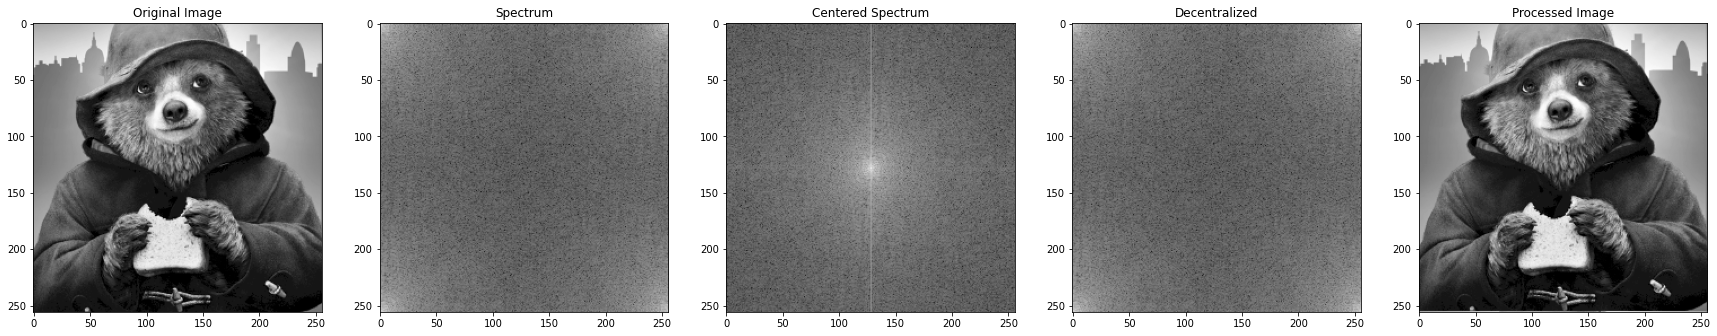

In [6]:
plt.figure(figsize=(30, 20), constrained_layout=False)

img_c1 = cv2.imread("bear.jpeg", 0)
img_c1 = cv2.resize(img_c1,(256,256))
img_c2 = fft(img_c1)
img_c3 = fft_shift(img_c2)
img_c4 = inv_fft_shift(img_c3)
img_c5 = inv_fft(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")
plt.show()

### Part 2: Low pass and High pass filters

Low pass

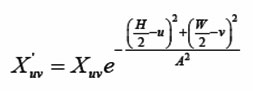

High pass

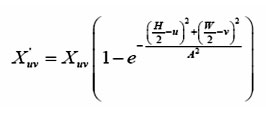

In [7]:
# Feel free to create any helper functions

# Task 2.a: 1 point
def gaussian_low_pass(A, shape):
    '''
    Creates gaussian low pass filter for a given image

    Parameters
    -----------
    A: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the low pass filter
    '''
    # TODO: YOUR CODE HERE
    H,W = shape

    filter = np.zeros(shape,dtype= complex)

    for i in range(H):
      for j in range(W):
        x = (((H/2) - i)**2 + ((W/2)-j)**2)
        x = x/(A**2)
        x = -x
        x = np.e**x
        filter[i,j] = x
    return filter
    

In [8]:
def gaussian_high_pass(A, shape):
    '''
    Creates gaussian high pass filter for a given image

    Parameters
    -----------
    A: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the high pass filter
    '''
    H,W = shape

    filter = np.zeros(shape,dtype= complex)
    for i in range(H):
      for j in range(W):
        x = (((H/2) - i)**2 + ((W/2)-j)**2)
        x = x/(A**2)
        x = -x
        x = np.e**x
        filter[i,j] = 1-x
    return filter


<ipython-input-9-592368314ff7>:22: RuntimeWarning: divide by zero encountered in log
  plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")


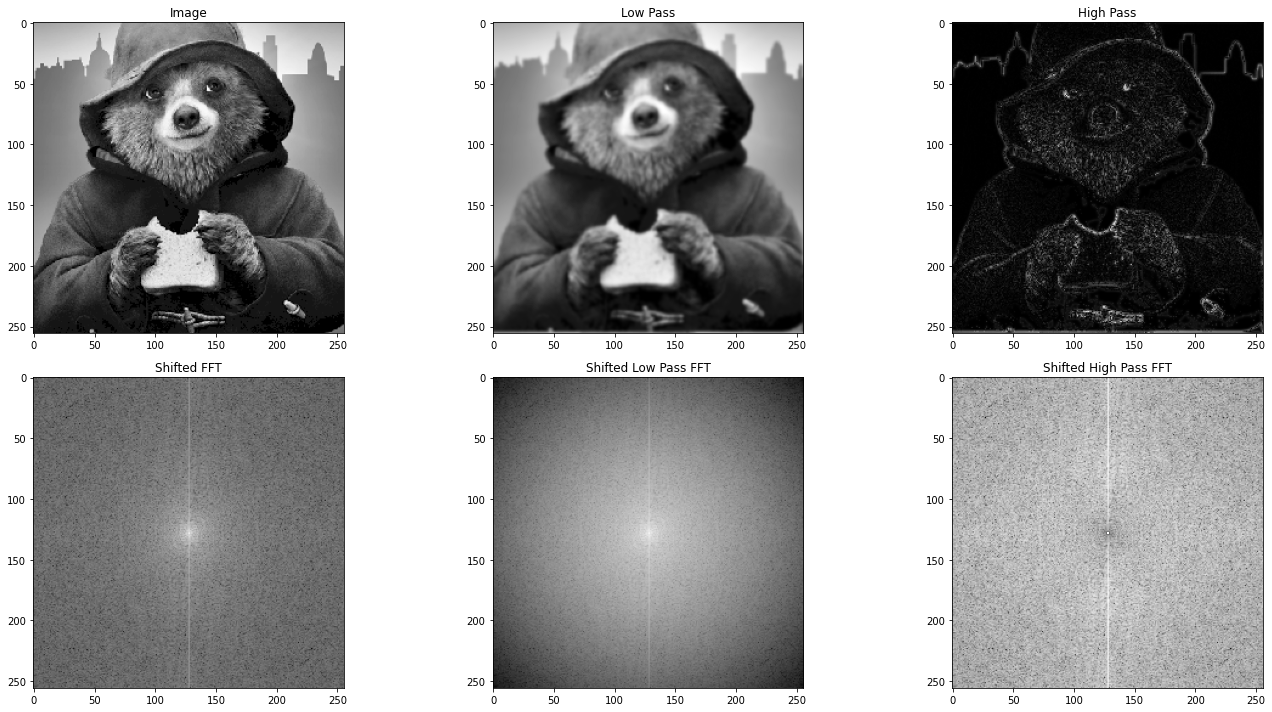

In [9]:
img = cv2.imread('./bear.jpeg', 0)
img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_NEAREST)
original = fft(img)
shifted = fft_shift(original)

# Finding the low pass frequency output and its corresponding invert
LPcenter = shifted * gaussian_low_pass(50, img.shape)
low_pass = inv_fft_shift(LPcenter)
inverse_low_pass = inv_fft(low_pass)

# Finding the high pass frequency output and its corresponding invert
HPcenter = shifted * gaussian_high_pass(50, img.shape)
high_pass = inv_fft_shift(HPcenter)
inverse_high_pass = inv_fft(high_pass)

plt.figure(figsize=(20, 10), constrained_layout=False)
plt.subplot(231), plt.imshow(img, "gray"), plt.title("Image")
plt.subplot(232), plt.imshow(np.abs(inverse_low_pass), "gray"), plt.title("Low Pass")
plt.subplot(233), plt.imshow(np.abs(inverse_high_pass), "gray"), plt.title("High Pass")
plt.subplot(234), plt.imshow(np.log(np.abs(shifted)), "gray"), plt.title("Shifted FFT")
plt.subplot(235), plt.imshow(np.log(np.abs(LPcenter)), "gray"), plt.title("Shifted Low Pass FFT")
plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")
plt.tight_layout()
plt.show()

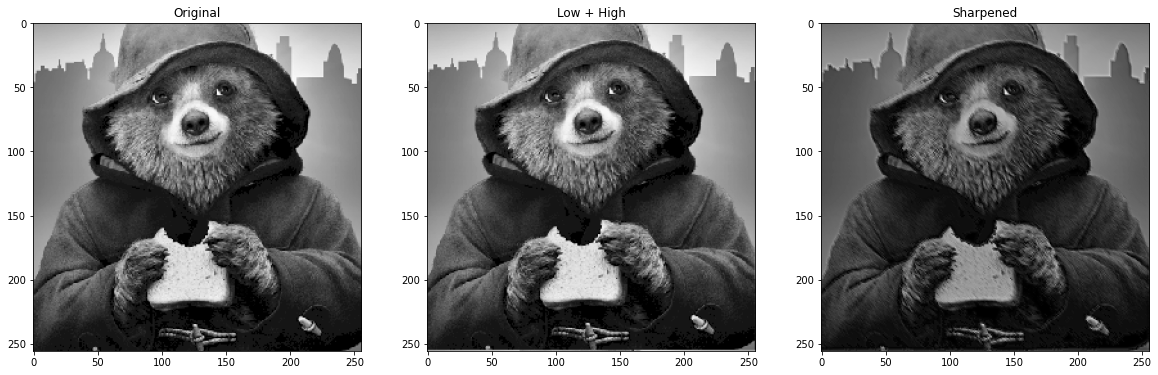

In [10]:
# You can also play with combining these outputs to sharpen images

plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(np.abs(img), 'gray'), plt.title('Original')
plt.subplot(132), plt.imshow(np.abs(inverse_low_pass + inverse_high_pass),'gray'), plt.title('Low + High')
plt.subplot(133), plt.imshow(np.abs(img + inverse_high_pass),'gray'), plt.title('Sharpened')
plt.show()

### Part 3: Filters in the FFT domain

In [11]:
def filter(mask, image):
    return mask * image

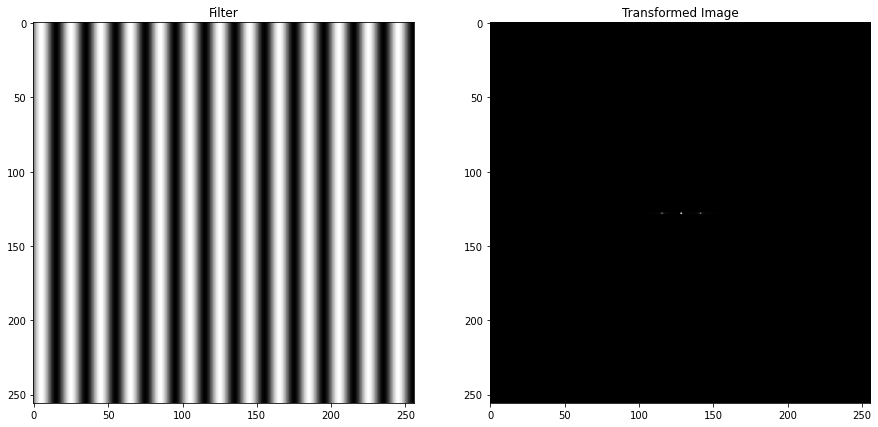

In [12]:
x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(2 * np.pi * x / 20)

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)

masked = filter(mask, shifted)
fft_mask = fft_shift(fft(mask))
inv_mask = inv_fft_shift(masked)
invert = inv_fft(inv_mask)

plt.figure(figsize=(15, 10), constrained_layout=False)
plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(fft_mask), "gray"), plt.title("Transformed Image")
plt.show()

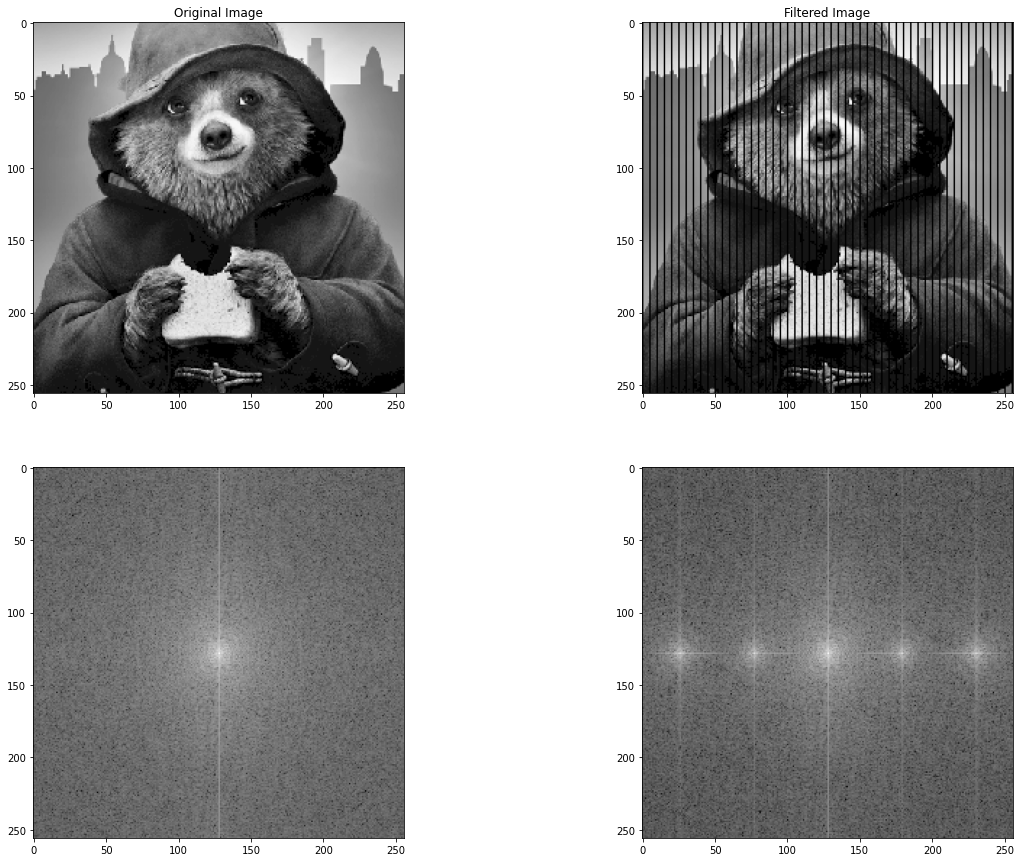

In [13]:
mask = np.ones(img.shape)

for i in range(img.shape[0]):
    for j in range(0, img.shape[1], 5):
        mask[i][j] = 0

filter_img = filter(mask, img)
fft_filtered_img = fft(filter_img)
fft_filtered = fft_shift(fft_filtered_img)

fft_img = fft(img)
fft_center = fft_shift(fft_img)

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()

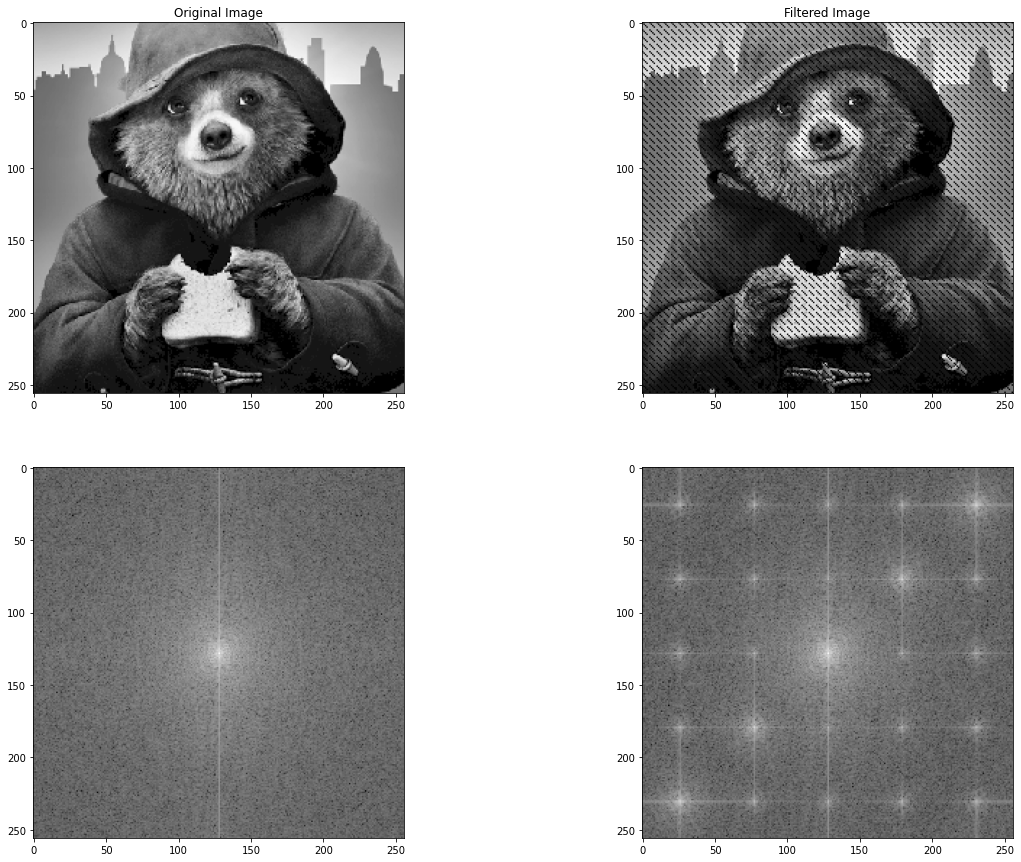

In [14]:
mask = np.ones(img.shape)

for size in range(4):
    for i in range(size, img.shape[0], 5):
        for j in range(size,img.shape[1], 5):
            mask[i][j] = 0

filter_img = filter(mask, img)
fft_filtered_img = fft(filter_img)
fft_filtered = fft_shift(fft_filtered_img)

fft_img = fft(img)
fft_center = fft_shift(fft_img)

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()

### Part 4: Construction of Hybrid Images (Optional)

In [25]:
# Task 3: 1 extra point
def create_hybrid_image(lp_image, hp_image ,A = 50):
    '''
    Creates a hybrid image combining low pass features from one image
    with high pass features from the other

    Parameters
    -----------
    lp_image: np.ndarray
      FF transformed image whose low pass features are to be combined
    
    hp_image: np.ndarray
      FF transformed image whose high pass features are to be combined

    Returns:
    -----------------------
    hybrid_image: np.ndarray
        A numpy array of the combined high pass and low pass image
    '''
    # creating the low frequency image:
    x = fft(lp_image)
    x = fft_shift(x)
    x = x*gaussian_low_pass(A,x.shape)
    x = inv_fft_shift(x)
    low_pass_image = inv_fft(x)

    #creating the high frequency image:
    x = fft(hp_image)
    x = fft_shift(x)
    x = x*gaussian_high_pass(A-30,x.shape)
    x = inv_fft_shift(x)
    high_pass_image = inv_fft(x)

    #combining the two images:
    hybrid = low_pass_image + high_pass_image

    return np.abs(hybrid)

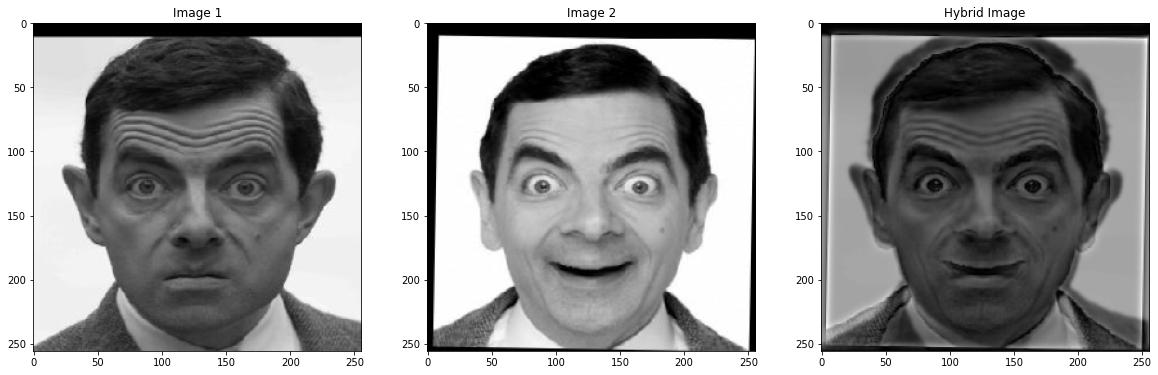

In [26]:
img1 = cv2.imread('./bean1.jpeg', 0)
img2 = cv2.imread('./bean2.jpeg', 0)
img1 = cv2.resize(img1, (256, 256), interpolation = cv2.INTER_NEAREST)
img2 = cv2.resize(img2, (256, 256), interpolation = cv2.INTER_NEAREST)

orig1 = fft(img1)
orig2 = fft(img2)

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(131), plt.imshow(img1, "gray"), plt.title("Image 1")
plt.subplot(132), plt.imshow(img2, "gray"), plt.title("Image 2")
plt.subplot(133), plt.imshow(create_hybrid_image(img1, img2), "gray"), plt.title("Hybrid Image")
plt.show()

The low frequency componencts are visible when zoomed out and the high freuquency components are visible normally/zoomed in. By adjusting the A value of both the high pass and low pass filter we can make a proper hybrid image.